In [86]:
import pyspark as ps   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
#import geoplot
spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("housing accessibility") \
            .getOrCreate()
sc = spark.sparkContext
spark.conf.set("spark.sql.caseSensitive", "true")


In [85]:
!which python

/Users/nicolacave/anaconda3/bin/python


In [63]:
housing = spark.read.option("header", True).csv('housing-wheelchairs-DFE.csv')
housing.createOrReplaceTempView("housing")
housing.printSchema()

root
 |-- _unit_id: string (nullable = true)
 |-- _golden: string (nullable = true)
 |-- _unit_state: string (nullable = true)
 |-- _trusted_judgments: string (nullable = true)
 |-- _last_judgment_at: string (nullable = true)
 |-- house_types: string (nullable = true)
 |-- house_types:confidence: string (nullable = true)
 |-- residential_yes: string (nullable = true)
 |-- residential_yes:confidence: string (nullable = true)
 |-- sidewalk_ok: string (nullable = true)
 |-- sidewalk_ok:confidence: string (nullable = true)
 |-- aadress: string (nullable = true)
 |-- house_types_gold: string (nullable = true)
 |-- house_types_gold_reason: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- residential_yes_gold: string (nullable = true)
 |-- residential_yes_gold_reason: string (nullable = true)
 |-- sidewalk_ok_gold: string (nullable = true)
 |-- sidewalk_ok_gold_reason: string (nullable = true)
 |-- url: string (nullable = true)



In [72]:
query1 = ('''
         SELECT *
         FROM housing
         WHERE sidewalk_ok = 'yes'
         ;
         ''')

sidewalk_ok = spark.sql(query1).toPandas()

sidewalk_ok #pd df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,house_types,house_types:confidence,residential_yes,residential_yes:confidence,sidewalk_ok,...,aadress,house_types_gold,house_types_gold_reason,lat,long,residential_yes_gold,residential_yes_gold_reason,sidewalk_ok_gold,sidewalk_ok_gold_reason,url
0,752055128,TRUE,golden,25,None,private_house,1,yes,1,yes,...,"4210 Southwest 167th Avenue, Beaverton, OR 970...",private_house,There seems to be single entry or door per fam...,45.489486,-122.848955,yes,You can mostly see houses where people live,yes,"There is a sidewalk available, it does look sa...","http://maps.google.com/maps?cbll=45.489486,-12..."
1,752055130,TRUE,golden,25,None,private_house,0.9642,yes,0.9642,yes,...,"1545 Southwest Nancy Drive, Gresham, OR 97080,...",private_house,There seems to be single entry or door per fam...,45.484122,-122.472306,yes,You can mostly see houses where people live,yes,"There is a sidewalk available, it does look sa...","http://maps.google.com/maps?cbll=45.484122,-12..."
2,752055131,TRUE,golden,23,None,private_house,1,yes,1,yes,...,"4990 Southwest 188th Place, Aloha, OR 97007, USA",private_house,There seems to be single entry or door per fam...,45.483409,-122.870494,yes,You can mostly see houses where people live,None,"There is a sidewalk available, it does look sa...","http://maps.google.com/maps?cbll=45.483409,-12..."
3,752055132,TRUE,golden,22,None,private_house,0.9174,yes,0.9174,yes,...,"2089 Southwest Nancy Drive, Gresham, OR 97080,...",private_house,There seems to be single entry or door per fam...,45.4822119,-122.476723,yes,You can mostly see houses where people live,None,None,"http://maps.google.com/maps?cbll=45.4822119,-1..."
4,752055133,TRUE,golden,24,None,private_house,1,yes,1,yes,...,"189-211 Glynbrook Street North, Keizer, OR 973...",None,None,44.97855,-123.0278,yes,You can mostly see houses where people live,None,None,"http://maps.google.com/maps?cbll=44.97855,-123..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,752065229,FALSE,finalized,1,7/9/15 6:51,private_house,1,yes,1,yes,...,"575 Southwest 39th Court, Miami, FL 33134, USA",None,None,25.76615743,-80.26075192,None,None,None,None,"http://maps.google.com/maps?cbll=25.766157,-80..."
5476,752065230,FALSE,finalized,1,7/9/15 6:47,private_house,1,yes,1,yes,...,"7604 Southeast Clay Street, Portland, OR 97215...",None,None,45.51130418,-122.5850514,None,None,None,None,"http://maps.google.com/maps?cbll=45.511304,-12..."
5477,752065231,FALSE,finalized,1,7/9/15 6:37,private_house,1,yes,1,yes,...,"1044 Rutland Way, Worthington, OH 43085, USA",None,None,40.09669364,-83.04498317,None,None,None,None,"http://maps.google.com/maps?cbll=40.096694,-83..."
5478,752065232,FALSE,finalized,1,7/9/15 7:06,apartment_blocks,1,yes,1,yes,...,"5961-5977 Watership Lane, Dallas, TX 75237, USA",None,None,32.67439287,-96.88120633,None,None,None,None,"http://maps.google.com/maps?cbll=32.674393,-96..."


In [71]:
query2 = ('''
         SELECT *
         FROM housing
         WHERE sidewalk_ok = 'no'
         ;
         ''')

sidewalk_not_ok = spark.sql(query2).toPandas()

sidewalk_not_ok #pd df

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,house_types,house_types:confidence,residential_yes,residential_yes:confidence,sidewalk_ok,...,aadress,house_types_gold,house_types_gold_reason,lat,long,residential_yes_gold,residential_yes_gold_reason,sidewalk_ok_gold,sidewalk_ok_gold_reason,url
0,752055129,TRUE,golden,26,None,private_house,1,yes,1,no,...,"4761 Southwest Martha Street, Portland, OR 972...",private_house,There seems to be single entry or door per fam...,45.4852149,-122.726314,yes,You can mostly see houses where people live,no,The sidewalk/pedestrian path is not safe for w...,"http://maps.google.com/maps?cbll=45.4852149,-1..."
1,752055143,TRUE,golden,24,None,private_house,1,yes,1,no,...,"373 Woodlane Drive, Springfield, OR 97477, USA",private_house,There seems to be single entry or door per fam...,44.069007,-123.021269,yes,You can mostly see houses where people live,no,None,None
2,752055145,TRUE,golden,34,None,private_house,0.9294,yes,0.9294,no,...,"2100 Westwood Lane, Eugene, OR 97401, USA",private_house,There seems to be single entry or door per fam...,44.065615,-123.0802803,yes,You can mostly see houses where people live,no,The sidewalk/pedestrian path is not safe for w...,"http://maps.google.com/maps?cbll=44.065615,-12..."
3,752055150,TRUE,golden,27,None,private_house,0.9639,yes,0.9639,no,...,"909 Southeast 2nd Street, Bend, OR 97702, USA",private_house,There seems to be single entry or door per fam...,44.041397,-121.304198,yes,You can mostly see houses where people live,None,None,"http://maps.google.com/maps?cbll=44.041397,-12..."
4,752055157,TRUE,golden,17,None,apartment_blocks,0.9421,yes,0.9421,no,...,"1 Cours d'Arnhem, 35200 Rennes, France",apartment_blocks,None,48.0855609,-1.6587163,yes,You can mostly see houses where people live,None,None,"http://maps.google.com/maps?cbll=48.0855609 ,-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,752065194,FALSE,finalized,1,7/9/15 6:54,private_house,1,yes,1,no,...,"23 Runyon Place, Scarsdale, NY 10583, USA",None,None,40.97535346,-73.77929693,None,None,None,None,"http://maps.google.com/maps?cbll=40.975353,-73..."
941,752065195,FALSE,finalized,1,7/9/15 7:04,private_house,1,yes,1,no,...,"367 Crestwood Avenue, Yonkers, NY 10707, USA",None,None,40.97063113,-73.81832795,None,None,None,None,"http://maps.google.com/maps?cbll=40.970631,-73..."
942,752065202,FALSE,finalized,1,7/9/15 6:57,private_house,1,yes,1,no,...,"3427 Bay Front Place, Baldwin, NY 11510, USA",None,None,40.62828675,-73.5940193,None,None,None,None,"http://maps.google.com/maps?cbll=40.628287,-73..."
943,752065204,FALSE,finalized,1,7/9/15 6:59,private_house,1,yes,1,no,...,"3618 Langley Drive, South Bend, IN 46614, USA",None,None,41.63733284,-86.24148434,None,None,None,None,"http://maps.google.com/maps?cbll=41.637333,-86..."


In [74]:
sidewalk_ok.count()

_unit_id                       5480
_golden                        5480
_unit_state                    5480
_trusted_judgments             5480
_last_judgment_at              5438
house_types                    5479
house_types:confidence         5480
residential_yes                5480
residential_yes:confidence     5480
sidewalk_ok                    5480
sidewalk_ok:confidence         5480
aadress                        5480
house_types_gold                 38
house_types_gold_reason          37
lat                            5479
long                           5479
residential_yes_gold             41
residential_yes_gold_reason      39
sidewalk_ok_gold                 30
sidewalk_ok_gold_reason          33
url                            5477
dtype: int64

In [80]:
sidewalk_not_ok.count()

_unit_id                       945
_golden                        945
_unit_state                    945
_trusted_judgments             945
_last_judgment_at              930
house_types                    945
house_types:confidence         945
residential_yes                945
residential_yes:confidence     945
sidewalk_ok                    945
sidewalk_ok:confidence         945
aadress                        945
house_types_gold                13
house_types_gold_reason         12
lat                            945
long                           945
residential_yes_gold            14
residential_yes_gold_reason     13
sidewalk_ok_gold                 9
sidewalk_ok_gold_reason          7
url                            943
dtype: int64

In [81]:
sw_ok_gold_reason = pd.Series(sidewalk_ok['sidewalk_ok_gold_reason'])
sw_ok_gold_reason.unique()

array(['There is a sidewalk available, it does look safe and wide enough',
       None], dtype=object)

In [82]:
sw_not_ok_gold_reason = pd.Series(sidewalk_not_ok['sidewalk_ok_gold_reason'])
sw_not_ok_gold_reason.unique()

array(['The sidewalk/pedestrian path is not safe for wheelchairs ��� it is not continuous or not wide enough or there seems to be other issues with the sidewalk',
       None, 'The sidewalk/pedestrian path is missing.'], dtype=object)

In [106]:
sidewalk_ok_gdf = geopandas.GeoDataFrame(
    sidewalk_ok, geometry=geopandas.points_from_xy(sidewalk_ok.long, sidewalk_ok.lat))

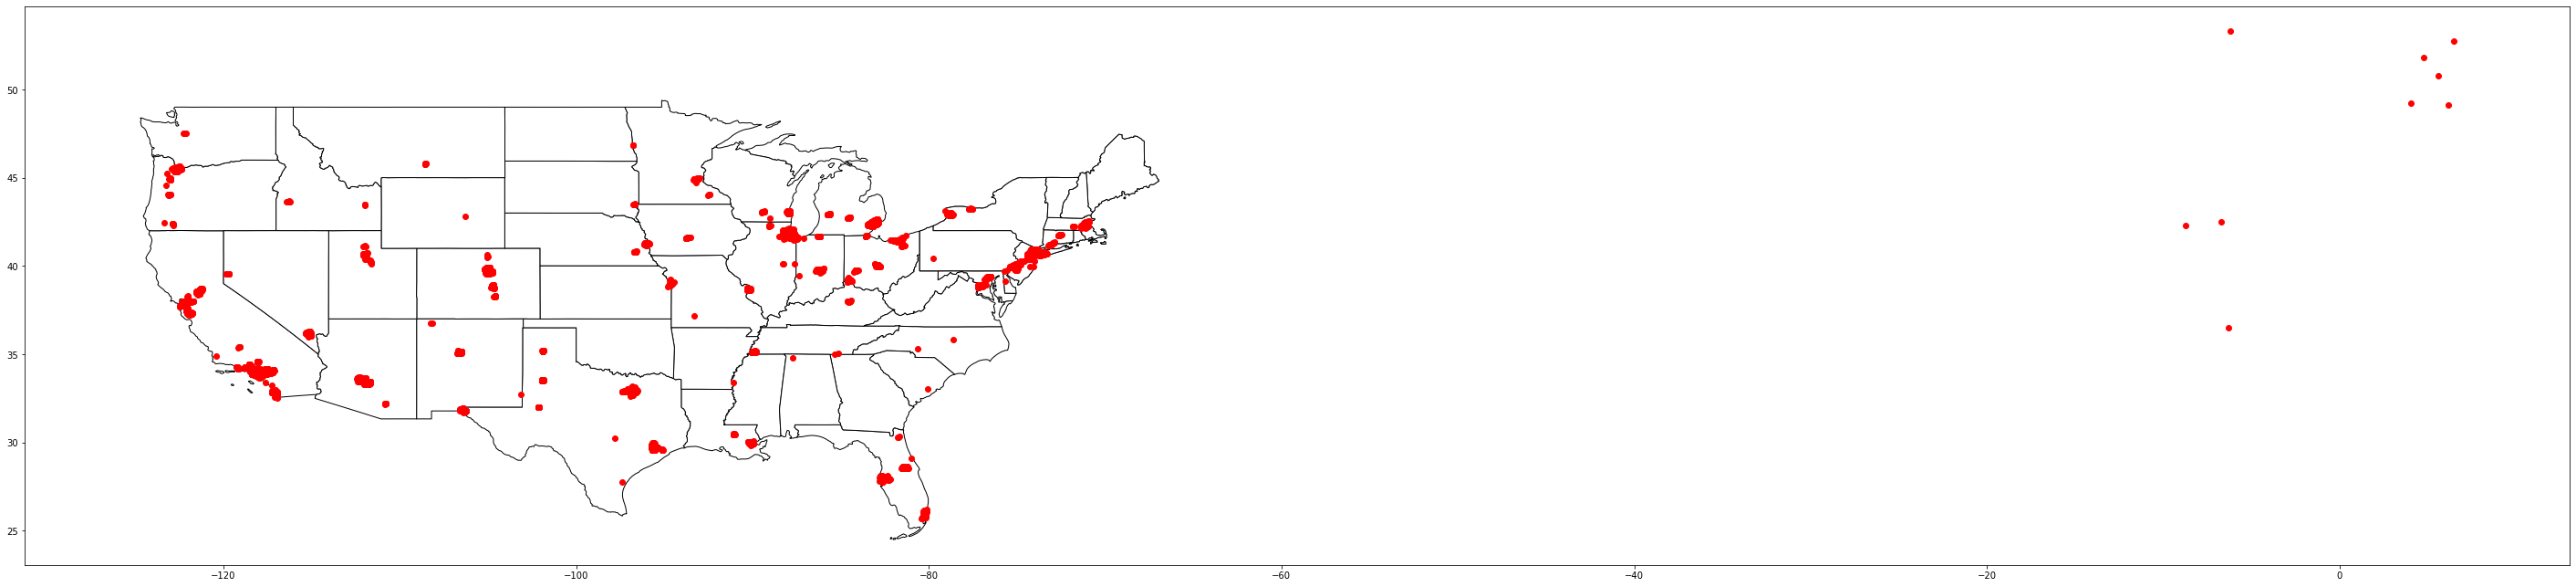

In [107]:
states = geopandas.read_file('/Users/nicolacave/dsi_galvanize/capstones/capstone1/geopandas-tutorial/data/usa-states-census-2014.shp')


ax = states.plot(
    color='white', edgecolor='black', figsize=(50,50))

# We can now plot our ``GeoDataFrame``.
sidewalk_ok_gdf.plot(ax=ax, color='red')

plt.show()

In [108]:
sidewalk_not_ok_gdf = geopandas.GeoDataFrame(
    sidewalk_not_ok, geometry=geopandas.points_from_xy(sidewalk_not_ok.long, sidewalk_not_ok.lat))

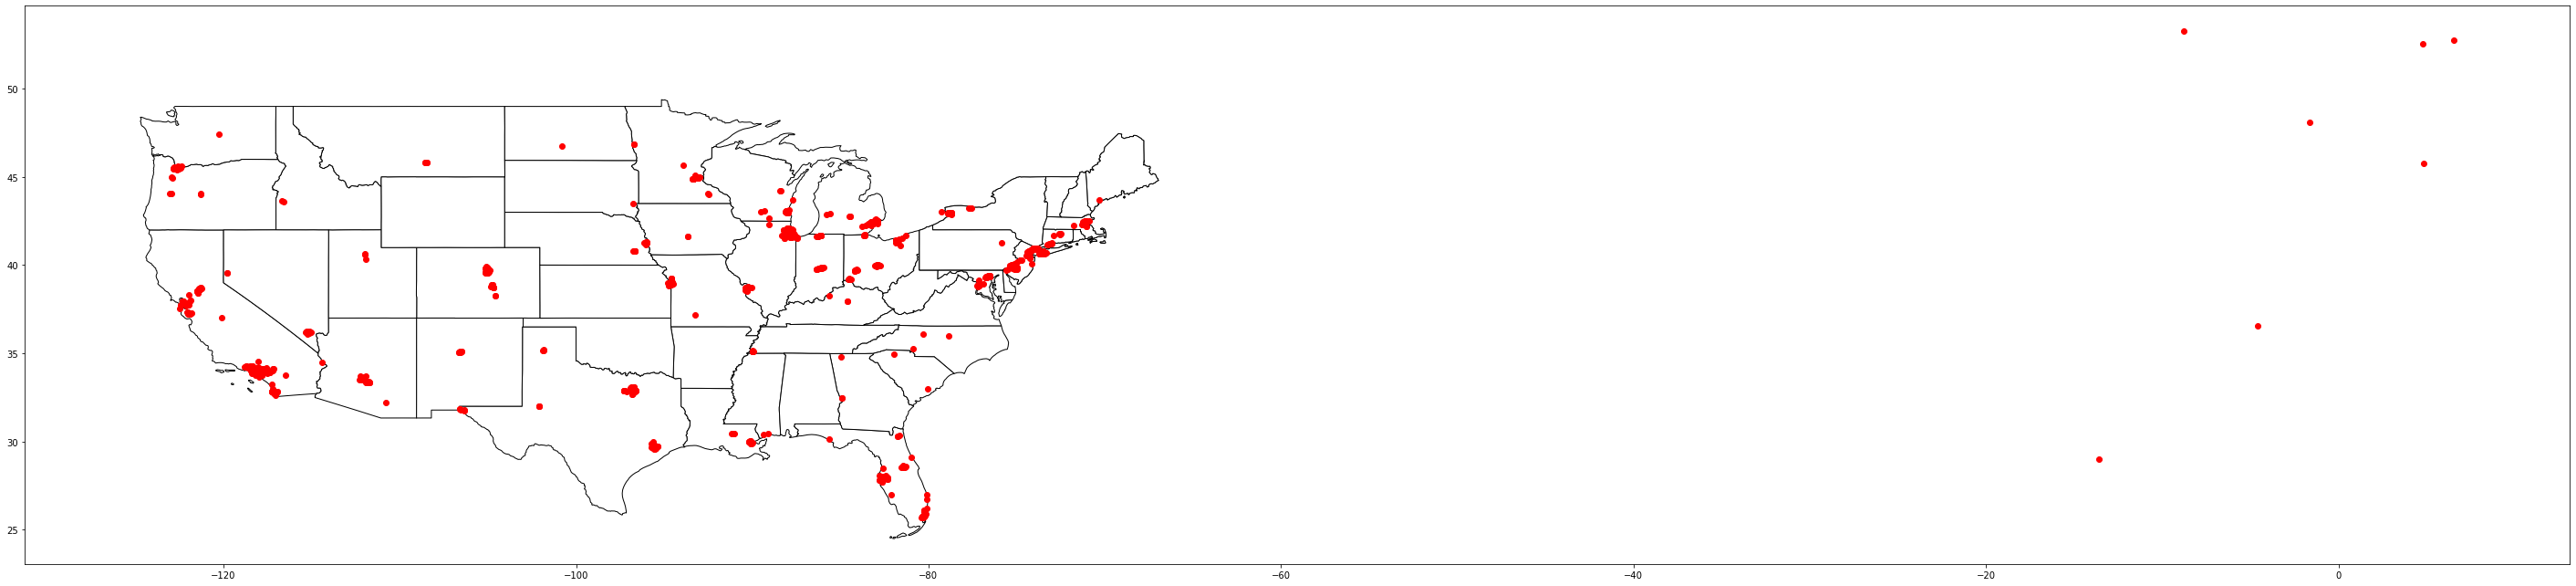

In [109]:
ax = states.plot(
    color='white', edgecolor='black', figsize=(50,50))

# We can now plot our ``GeoDataFrame``.
sidewalk_not_ok_gdf.plot(ax=ax, color='red')

plt.show()